# Predicting Coffee Grade

## Exploratory Data Analysis

## Table of Contents

* [1. Introduction](#introduction)
* [2. Import Libraries](#imp)
* [3. Load and Explore Data](#load)
* [4. Questions Worth Exploring](#questions)
* [5. Feature Analysis](#feature)
   * [5.1 Is there a correlation between Coffee Grade and Total Cup Points?](#tcp)
   * [5.2 Is there a correlation between Coffee Grade and Altitude?](#altitude)
   * [5.3 What Countries produce the Best Coffee?](#countries)
   * [5.4 What are the Best Coffee Varieties?](#varieties)
   * [5.5 Can we see any trends regarding Coffee Grade and other categorical features?](#trends)
   * [5.6 Scatter Matrix, Heatmap, and Correlation Matrix](#scatter)
* [6. Conclusion](#conclusion)

<a class="anchor" id="introduction"></a>
## 1. Introduction

Because we started our data cleaning in the Data Wrangling section, we took take care of a few points from EDA in our initial exploration such as uncovering the structure of the dataset and detecting outliers and anomalies from our numerical features.

<a class="anchor" id="imp"></a>
## 2. Import Libraries

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


<a class="anchor" id="load"></a>

## 3. Load and Explore Data

In [2]:
#Load dataset
coffee2 = pd.read_csv('../data/coffee2.csv')

In [3]:
#Delete Unnamed column and check out the data frame
coffee2 = coffee2.drop(columns=['Unnamed: 0'])
coffee2.head()

,Country of Origin,Variety,Mean Altitude (m),Harvest Year,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,...,Uniformity,Clean Cup,Sweetness,Overall,Total Cup Points,Moisture,Color,Quakers,Total_Defects,Coffee_Grade
0,Taiwan,Gesha,1200.0,2020,Natural / Dry,8.58,8.67,8.17,8.25,8.50,...,10.0,10.0,10.0,8.50,89.25,11.0,None,0,0,Specialty
1,Kenya,SL28,1650.0,2019,Washed / Wet,8.33,8.50,8.25,8.67,8.42,...,10.0,10.0,10.0,8.58,89.17,11.0,Green,0,1,Specialty
2,Colombia,Typica,1800.0,2021,Washed / Wet,8.17,8.33,8.25,8.25,8.17,...,10.0,10.0,10.0,8.83,88.17,11.0,Green,0,0,Specialty
3,Ethiopia,Ethiopian Heirlooms,2219.0,2020,Other,8.25,8.25,7.92,8.42,7.92,...,10.0,10.0,10.0,8.33,87.17,11.0,Green,3,4,Premium
4,Colombia,Other,1650.0,2019,Pulped natural / honey,8.33,8.08,7.75,8.33,8.17,...,10.0,10.0,10.0,8.25,87.08,11.0,None,0,0,Specialty


Let's check out a sample of the data

In [4]:
coffee2.sample(5).T

,39,125,28,85,15
Country of Origin,Guatemala,Peru,"Tanzania, United Republic Of",Brazil,Vietnam
Variety,Typica,Caturra,Orange Bourbon,Mundo Novo,Catimor
Mean Altitude (m),1800,1550,1750,900,1040
Harvest Year,2021,2020,2021,2020,2020
Processing Method,Washed / Wet,Washed / Wet,Washed / Wet,Natural / Dry,Washed / Wet
Aroma,7.58,7.67,7.75,7.58,7.92
Flavor,7.92,7.42,7.75,7.5,8.08
Aftertaste,7.67,7.58,7.75,7,7.75
Acidity,7.75,7.42,7.83,7.83,7.83
Body,7.75,7.75,7.83,7.67,8.08


In [5]:
# Inspect numerical columns
coffee2.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Mean Altitude (m),150.0,1470.720800,337.595346,442.00,1200.00,1500.00,1700.0000,2229.00
Harvest Year,150.0,2020.206667,0.668532,2019.00,2020.00,2020.00,2021.0000,2021.00
Aroma,150.0,7.722400,0.220267,7.50,7.58,7.67,7.8300,8.58
Flavor,150.0,7.733200,0.228715,7.42,7.58,7.75,7.8300,8.67
Aftertaste,150.0,7.542667,0.223020,7.00,7.42,7.50,7.6475,8.25
Acidity,150.0,7.704067,0.222228,7.25,7.58,7.67,7.7500,8.67
Body,150.0,7.677133,0.200608,7.25,7.50,7.67,7.7500,8.50
Balance,150.0,7.666267,0.199141,7.33,7.58,7.58,7.7300,8.58
Uniformity,150.0,9.991067,0.077105,9.33,10.00,10.00,10.0000,10.00
Clean Cup,150.0,10.000000,0.000000,10.00,10.00,10.00,10.0000,10.00


Box plots will give us a general feel for the values in our numerical columns and will highlight any major outliers. Though we dealt with outliers in our previous notebook, it's worth visualizing here.

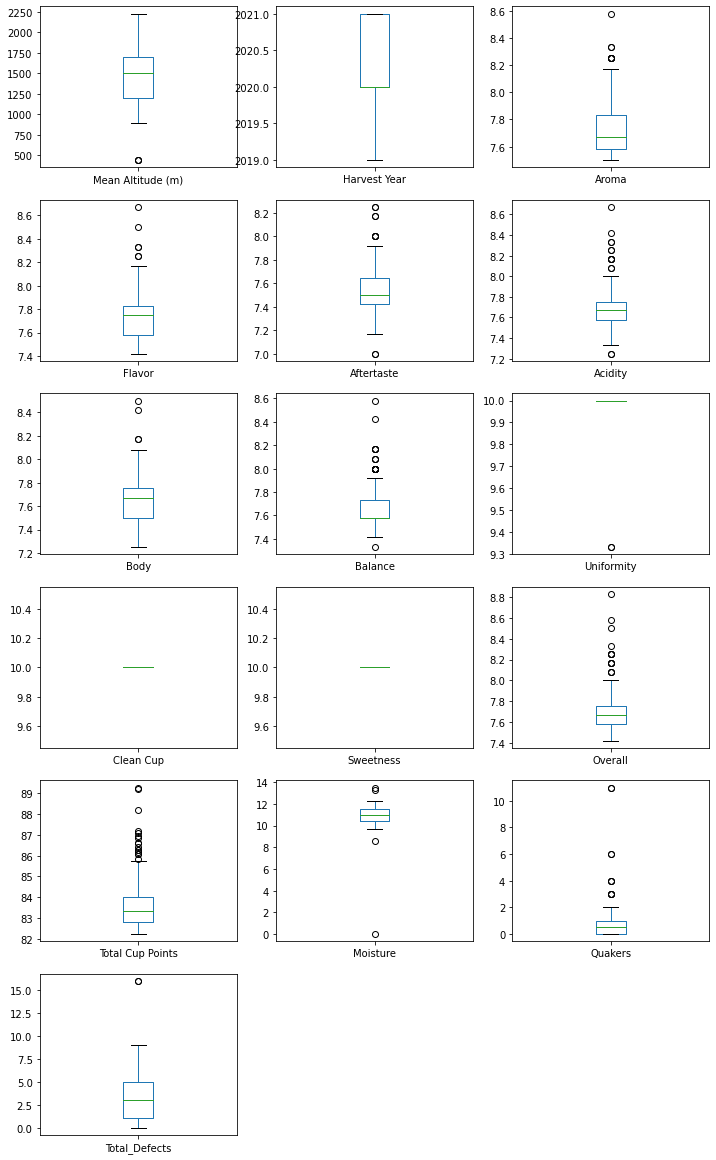

In [6]:
#create box plots of numerical data
coffee2.plot(kind='box', subplots=True, layout=(10,3), 
        sharex=False, sharey=False, figsize=(12,35))

plt.show()

I can see that the Clean Cup and Sweetness columns contain only 10s. Because this won't help with any analysis, I am going to go ahead and delete those two columns. I am also going to go ahead and delete all the columns of individual quality measures on which the coffee was graded. I will keep Total Cup points which is the sum of these measures for further analysis.

In [7]:
coffee2 = coffee2.drop(columns=['Clean Cup','Sweetness', 'Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Overall'])

In [8]:
# Inspect categorical columns
coffee2.describe(exclude=[np.number]).T

,count,unique,top,freq
Country of Origin,150,20,Guatemala,36
Variety,150,17,Caturra,41
Processing Method,150,4,Washed / Wet,103
Color,150,5,Green,120
Coffee_Grade,150,4,Premium,79


The categorical features look good. As mentioned in the previous notebook, I will reduce the number of Countries and Varieties by creating an Other category for modelling later.

<a class="anchor" id="questions"></a>

## 4. Questions Worth Exploring

### We performed some exploration in the previous part of our project, but some questions still remain that we would like to explore in this notebook:

1. Is there a correlation between Coffee Grade and Total Cup Points?

2. Do coffee features such as the country of origin, variety, altitude at which the coffee beans were grown, harvest year, processing method affect the Total Cup Points and/or the Coffee Grade? 

3. Is a heatmap of our features going to reveal any unexpected correlations?


<a class="anchor" id="feature"></a>

## 5. Feature Analysis

<a class="anchor" id="tcp"></a>

### 5.1 Q: Is there a correlation between Coffee Grade and Total Cup Points?

We'll start by plotting a box and swarm plot of the Total Cup Points split by Coffee Grade

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


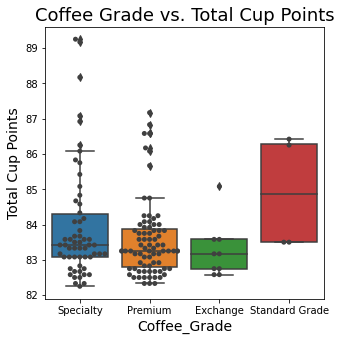

In [9]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Coffee_Grade", y="Total Cup Points", 
            order=["Specialty","Premium","Exchange","Standard Grade"],
            data=coffee2)
plt.ylabel("Total Cup Points", size=14)
plt.xlabel("Coffee Grade", size=14)
plt.title("Coffee Grade vs. Total Cup Points", size=18)

ax = sns.swarmplot(x="Coffee_Grade", y="Total Cup Points", order=["Specialty","Premium","Exchange","Standard Grade"], data=coffee2, color=".25")

It looks like, in general, the lower the grade the lower the Total Cup Points. The Standard Grade doesn't fit this trend but, because there are so few data points for that grade (namely, 4), that is most likely chalked up to random error. I won't invest into this question more because I am not planning on using this feature in our model.

Now lets do the same thing but look at Altitude

<a class="anchor" id="altitude"></a>

### 5.2 Q: Is there a correlation between Coffee Grade and Altitude at which the coffee was grown?

Let's start off by looking at the box and swarm plots of our altitudes separated by coffee grade.

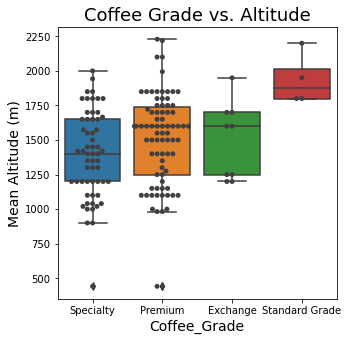

In [10]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Coffee_Grade", y="Mean Altitude (m)", order=["Specialty","Premium","Exchange","Standard Grade"],
            data=coffee2)
plt.ylabel("Total Cup Points", size=14)
plt.xlabel("Coffee Grade", size=14)
plt.title("Coffee Grade vs. Altitude", size=18)

ax = sns.swarmplot(x="Coffee_Grade", y="Mean Altitude (m)", order=["Specialty","Premium","Exchange","Standard Grade"], data=coffee2, color=".25")

It seems to be the case that the higher the altitude, the lower the grade in general. Because our data is so limited and, specifically, our data for Exchange and Standard Grade coffee is lacking, for this project I will do some statistical tests on the Specialty and Premium grades to see if the difference in altitudes are statistically significant.

Lets look at the distributions of our altitudes for Specialty and Premium coffees:

Mean: 1393.4310344827586


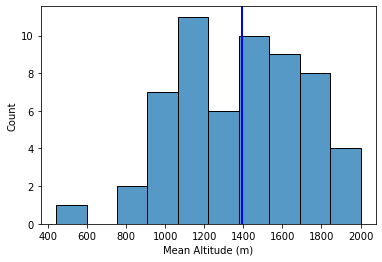

In [11]:
specialty_altitude = coffee2[coffee2.Coffee_Grade == 'Specialty']
sns.histplot(specialty_altitude, x = 'Mean Altitude (m)', bins=10)
plt.axvline(x=specialty_altitude['Mean Altitude (m)'].mean(), color = 'blue', linewidth = 2, label = 'Algarve Resort mean')

print('Mean:' , specialty_altitude['Mean Altitude (m)'].mean())

It looks relatively normally distributed but let's go ahead and run the normal test result. Our null hypothesis is that the true distribution is normal.

In [12]:
stats.normaltest(specialty_altitude['Mean Altitude (m)'])

NormaltestResult(statistic=0.9868894279222729, pvalue=0.6105197020504877)

This high p-value of .6 means we cannot reject the null that the true distribution is normal.

Now lets look at the distribution of the altitudes for the Premium coffee.

Mean: 1501.1281012658228


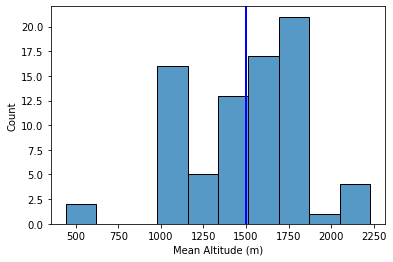

In [13]:
premium_altitude = coffee2[coffee2.Coffee_Grade == 'Premium']
sns.histplot(premium_altitude, x= 'Mean Altitude (m)', bins=10)
plt.axvline(x=premium_altitude['Mean Altitude (m)'].mean(), color = 'blue', linewidth = 2, label = 'Algarve Resort mean')

print('Mean:' , premium_altitude['Mean Altitude (m)'].mean())

In [14]:
stats.normaltest(premium_altitude['Mean Altitude (m)'])

NormaltestResult(statistic=6.573227814178901, pvalue=0.0373802082021436)

Based on the p-value of .03 (which is less than our threshold of significance of .05), we can reject the null that the true distribution is normal. It seems like this distribution is bimodal and I find it interesting that the dip in data looks to be between 1100 and 1500 which is around where our altitudes for the Specialty coffee is centered. I wonder if this is just due to randomness in our data or that is the sweet spot when it comes to optimal altitude for coffee beans.

Let's look at these histograms on the same graph to compare.

Text(0.5, 1.0, 'Distribution of the mean altitudes with means')

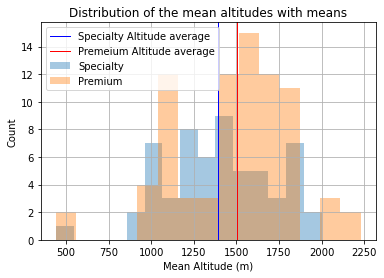

In [15]:
#Ploting the 2 distributions
specialty_altitude['Mean Altitude (m)'].hist(bins = 15, alpha = 0.4, label = 'Specialty')
premium_altitude['Mean Altitude (m)'].hist(bins = 15, alpha = 0.4, label = 'Premium')

#Ploting the means of the 2 distributions
plt.axvline(x=specialty_altitude['Mean Altitude (m)'].mean(), color = 'blue', linewidth = 1, label = 'Specialty Altitude average')
plt.axvline(x=premium_altitude['Mean Altitude (m)'].mean(), color = 'red', linewidth = 1, label = 'Premeium Altitude average')

plt.legend()
plt.xlabel('Mean Altitude (m)')
plt.ylabel('Count')
plt.title('Distribution of the mean altitudes with means')

It's easy to see by the graph that the Premium average altitude is larger than the Specialty as we saw in the box plots. Next we will test if this difference in mean can be explained by random error or is statistically significant.

Null Hypothesis: The altitude has no affect of the coffee grade.

In [16]:
#Create df with only specialty and premium coffees
both_altitudes = pd.concat([specialty_altitude, premium_altitude])

Since the data aren't normally distributed, we will be using a non-parametric test. For our data, we will be conducting a permutation test. In this test we will take 1000 random permutations of the data, calculate the means of the altitudes of each Coffee Grade, and subtract those means from each other to get 1000 differences which we can compare to the difference of our observed data and either reject or not reject our null hypothesis.

The permutation test is useful when we do not know how to compute the distribution of a test statistic.

In [17]:
# First let's create a new column where we will store a permutaion of the is_canceled values.
both_altitudes['Permutation'] = np.random.permutation(both_altitudes['Mean Altitude (m)'])

# Now let's check the new distributions after permutations
both_altitudes.groupby('Coffee_Grade')['Permutation'].describe()

# Let's calculate the difference in mean between the 2 distributions before and after permutations
observed_diff = both_altitudes['Mean Altitude (m)'][both_altitudes.Coffee_Grade == 'Specialty'].mean() - both_altitudes['Mean Altitude (m)'][both_altitudes.Coffee_Grade == 'Premium'].mean() 


perm_diff = both_altitudes.groupby('Coffee_Grade')['Permutation'].describe().loc['Specialty', 'mean'] \
        - both_altitudes.groupby('Coffee_Grade')['Permutation'].describe().loc['Premium', 'mean']
print('Real difference of our observed data is {} and difference after permutation of values is {}' \
      .format(round(observed_diff, 2), round(perm_diff, 2)))

Real difference of our observed data is -107.7 and difference after permutation of values is -2.39


The difference in the means for Permutation looks hugely different to our observed difference of -107.7. It's starting to look like our observed difference is significant, and that the Null Hypothesis is false; the altitude does make a difference in coffee grade.

But to be sure this is not just chance, let's create 1,000 permutations, calculate the mean of the permutation of the cancelation percentages and the difference between these for each one.

Let's create a vector with the differences - that will be the distibution of the Null.

In [18]:
difference = np.empty(1000)

Now let's make a for loop that does the following 1,000 times:

1. makes a permutation of the altitude as we did above
2. calculates the difference in the mean between the 2 coffee grades (specialty and premium).

In [19]:
np.random.seed(42)
for i in range(1000):
    both_altitudes['Permutation_x'] = np.random.permutation(both_altitudes['Mean Altitude (m)'])
    difference[i] = both_altitudes.groupby('Coffee_Grade')['Permutation_x'].describe().loc['Specialty', 'mean'] \
        - both_altitudes.groupby('Coffee_Grade')['Permutation_x'].describe().loc['Premium', 'mean']

In [20]:
p_value = np.sum(difference <= observed_diff) / len(difference)
print('Test P_value = ', p_value)

Test P_value =  0.012


Now that we have 1000 differences, we can plot the mean difference distribution and compare it to our observed difference.

Text(0.5, 1.0, 'Mean difference distribution for 1000 permutations compared to Observed difference')

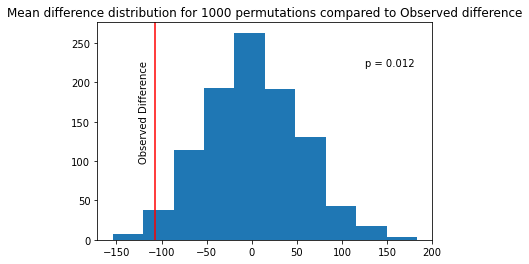

In [21]:
plt.hist(difference)
plt.axvline(x=observed_diff, color = 'red')
plt.text(-125,100,'Observed Difference',rotation=90)
plt.text(125,220,'p = 0.012')
plt.title('Mean difference distribution for 1000 permutations compared to Observed difference')

Conclusion: Since the p-value is .012 we can reject the null hypothesis and infer a statistical significance between the altitudes of the Special Grade coffee and the Premium Coffee.

<a class="anchor" id="countries"></a>

### 5.3 Q: What Countries produce the Best Coffee?

To analyze this question and others, I'm going to create a new column that gives numerical labels to our Coffee Grades. The labels will correspond with the standard coffee grade labels.
1. Specialty: Grade 1
2. Premium: Grade 2
3. Exchange: Grade 3
4. Standard Grade: Grade 4

In [22]:
#create Coffee Grade Numerical column

def CoffeeGradeNum(df):

    if (df['Coffee_Grade'] == 'Specialty'):
        return 1
    elif (df['Coffee_Grade'] == 'Premium'):
        return 2
    elif(df['Coffee_Grade'] == 'Exchange'):
        return 3
    elif (df['Coffee_Grade'] == 'Standard Grade'):
        return 4
    else:
        return 'Not Graded'

coffee2['Coffee_Grade_Num'] = coffee2.apply(CoffeeGradeNum, axis = 1)

In [23]:
#check out value counts for our Coffee Grades
coffee2.Coffee_Grade_Num.value_counts()

2    79
1    58
3     9
4     4
Name: Coffee_Grade_Num, dtype: int64

These counts match our counts for the categorical Coffee Grade column.

Now that we've labeled our Coffee Grades numerically, lets look at the mean Total Cup Points and Coffee Grades by country. Remember, we want a higher Total Cup Points score and a lower Coffee Grade


In [24]:
means_by_country = coffee2.groupby('Country of Origin')[['Total Cup Points','Coffee_Grade_Num']].mean().sort_values(by='Total Cup Points', ascending=False)
means_by_country

,Total Cup Points,Coffee_Grade_Num
Country of Origin,,
Ethiopia,86.020833,2.083333
Taiwan,85.875000,1.166667
Kenya,85.276667,1.500000
"Tanzania, United Republic Of",84.665000,1.500000
Burundi,84.080000,1.000000
Vietnam,84.056667,1.000000
Colombia,84.010000,1.411765
Rwanda,83.500000,4.000000
Uganda,83.500000,1.500000


Let's look at this in a scatter plot

Text(0.5, 1.0, 'Average Coffee Grade vs. Total Cup Points By Country')

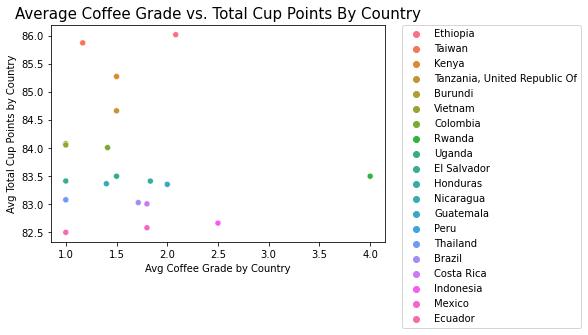

In [25]:
sns.scatterplot(x='Coffee_Grade_Num', y = 'Total Cup Points' , data=means_by_country,hue="Country of Origin" )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.ylabel("Avg Total Cup Points by Country", size=10)
plt.xlabel("Avg Coffee Grade by Country", size=10)
plt.title("Average Coffee Grade vs. Total Cup Points By Country", size=15)

We can see there is a slight negative correlation between the two. If we think about the 'best' coffee being that of low grade and high total cup points, it seems that Taiwan, Kenya, Ethiopia, and Tanzania in the upper left corner of the plot are the top Countries.

Another way we can look at this is looking at the mean number of defects and quakers per country since the coffee grade is directly related to those features.

In [26]:
#create a df grouped by Country of Origin
mean_country = coffee2.groupby("Country of Origin").mean().sort_values("Total_Defects")

Text(0, 0.5, 'Defects plus quakers')

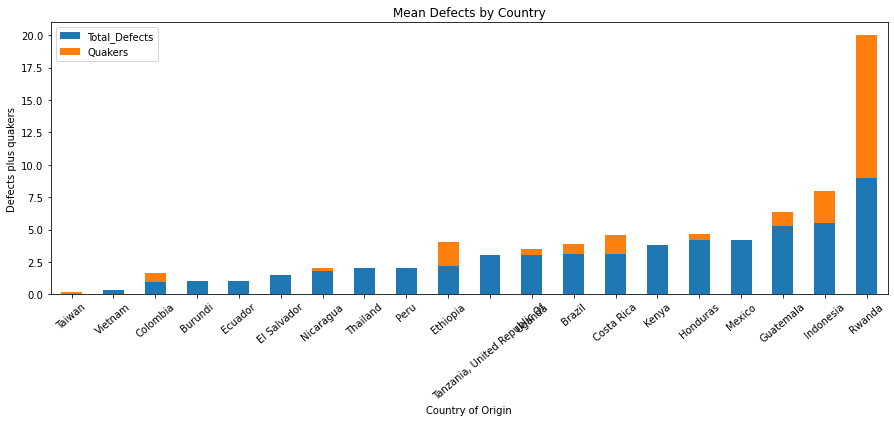

In [27]:
#create graph
mean_country.plot.bar(y=['Total_Defects','Quakers'], rot=40, figsize=(15,5), stacked=True)
plt.title("Mean Defects by Country")
plt.ylabel('Defects plus quakers')

Based on this chart, the best coffees (based on smallest number of defects) are Taiwan, Vietnam, Burundi, and Ecuador.

Because our data is very unbalanced in regards to Country of Origin, let's look at one last graph to see what percentage of each variety is each of our 4 grades. 

In [28]:
percentages_country = pd.crosstab(coffee2['Country of Origin'],coffee2['Coffee_Grade']).apply(lambda r: r/r.sum(), axis=1)
percentages_country

Coffee_Grade,Exchange,Premium,Specialty,Standard Grade
Country of Origin,,,,
Brazil,0.000000,0.714286,0.285714,0.000000
Burundi,0.000000,0.000000,1.000000,0.000000
Colombia,0.000000,0.411765,0.588235,0.000000
Costa Rica,0.000000,0.800000,0.200000,0.000000
Ecuador,0.000000,0.000000,1.000000,0.000000
El Salvador,0.000000,0.000000,1.000000,0.000000
Ethiopia,0.083333,0.416667,0.333333,0.166667
Guatemala,0.055556,0.888889,0.055556,0.000000
Honduras,0.333333,0.166667,0.500000,0.000000


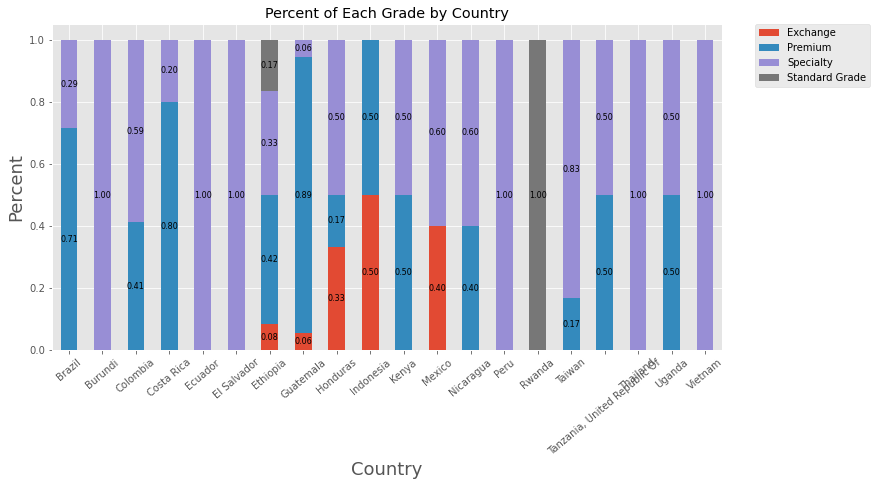

In [29]:
plt.style.use('ggplot')
ax = percentages_country.plot(kind='bar', stacked=True, figsize=(12, 6), rot=40, xlabel='Variety', ylabel='Percent')
   
# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

     # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("Percent", fontsize=18)
ax.set_xlabel("Country", fontsize=18)
ax.set_title("Percent of Each Grade by Country")
plt.show()

Here we are looking for a bar with majority purple (Specialty) and blue (Premium). It seems that our top coffees based on this graph are from: Burundi, Ecuador, El Salvador, Peru, Thailand, and Vietnam.

<a class="anchor" id="varieties"></a>

### 5.4 Q: What are the Best Coffee Varieties?

We'll start by looking at how much data we have of each coffee variety.

Text(0.5, 0, 'Count')

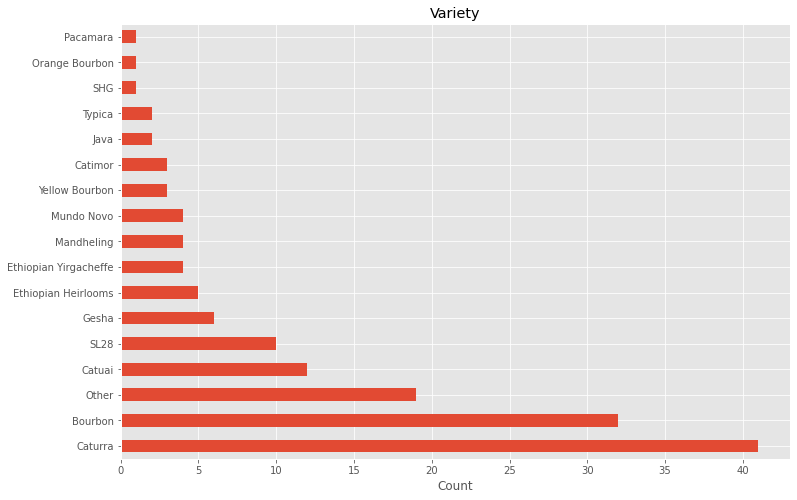

In [30]:
coffee2['Variety'].value_counts().plot(kind='barh', width = .5, figsize = (12,8))
plt.title('Variety')
plt.xlabel('Count')

It seems like we have a lot of Caturra and Bourbon coffees in our data but many varieties with under 5 data points. This is to be expected with our small data set.

Next let's look at mean Total Cup Points and Coffee Grade by Variety

In [31]:
means_by_variety = coffee2.groupby('Variety')[['Total Cup Points','Coffee_Grade_Num']].mean().sort_values(by='Total Cup Points', ascending=False)
means_by_variety

,Total Cup Points,Coffee_Grade_Num
Variety,,
Typica,86.045000,1.500000
Gesha,85.875000,1.166667
Ethiopian Yirgacheffe,85.812500,2.500000
Ethiopian Heirlooms,85.784000,2.000000
SHG,84.670000,1.000000
SL28,84.566000,1.500000
Orange Bourbon,84.250000,2.000000
Pacamara,84.250000,2.000000
Catimor,84.056667,1.000000


To see how these features compare, we can plot them on a scatter plot

Text(0.5, 1.0, 'Average Coffee Grade vs. Total Cup Points By Variety')

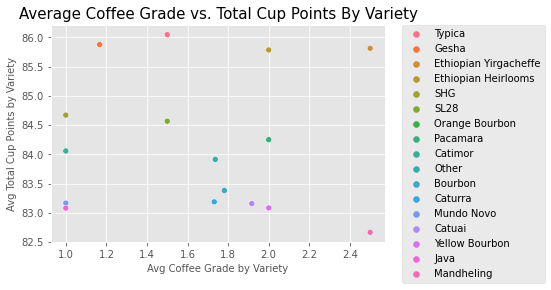

In [32]:
sns.scatterplot(x='Coffee_Grade_Num', y = 'Total Cup Points' , data=means_by_variety ,hue="Variety" )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.ylabel("Avg Total Cup Points by Variety", size=10)
plt.xlabel("Avg Coffee Grade by Variety", size=10)
plt.title("Average Coffee Grade vs. Total Cup Points By Variety", size=15)

Based on this scatter plot, there seems to be less of a correlation between mean total cup points and mean coffee grade based on Coffee Variety compared to that of Country. If we think about the 'best' coffee being that of low grade and high total cup points, it seems that Gesha, Typica, SHG, and SL28 in the upper left corner of the plot are the top varieties.

Like we did with countries, lets go ahead and look at the number of defects and quakers by variety

Text(0, 0.5, 'Defects plus quakers')

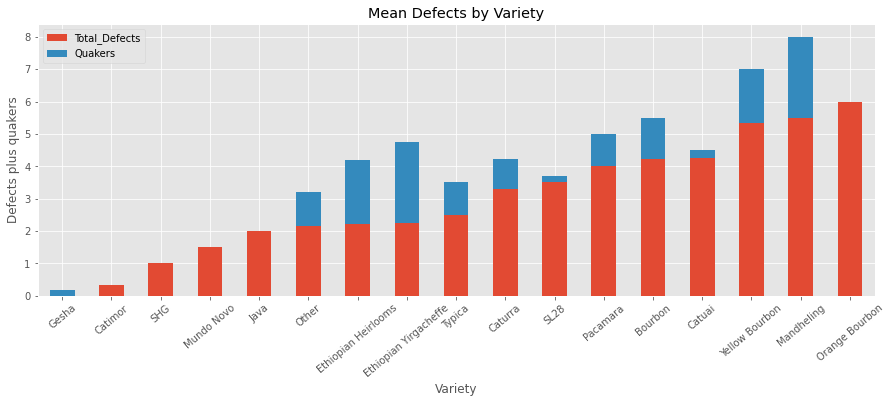

In [33]:
mean_variety = coffee2.groupby("Variety").mean().sort_values("Total_Defects")

mean_variety.plot.bar(y=['Total_Defects','Quakers'], rot=40, figsize=(15,5), stacked=True)
plt.title("Mean Defects by Variety")
plt.ylabel('Defects plus quakers')

If we are judging best coffies based on smallest number of defects, then Gesha, Catimor, SHG, and Mundo Novo are the top. Gesha and SHG were also top coffees based on our analysis with the scatter plot above. It is worth noting that we only have one data point with variety SHG.

Because our data is very unbalanced in regards to Variety, let's look at one last graph to see what percentage of each variety is each of our 4 grades. 

In [34]:
percentages_variety = pd.crosstab(coffee2['Variety'],coffee2['Coffee_Grade']).apply(lambda r: r/r.sum(), axis=1)
percentages_variety

Coffee_Grade,Exchange,Premium,Specialty,Standard Grade
Variety,,,,
Bourbon,0.000000,0.593750,0.343750,0.0625
Catimor,0.000000,0.000000,1.000000,0.0000
Catuai,0.166667,0.583333,0.250000,0.0000
Caturra,0.097561,0.536585,0.365854,0.0000
Ethiopian Heirlooms,0.000000,0.400000,0.400000,0.2000
Ethiopian Yirgacheffe,0.250000,0.250000,0.250000,0.2500
Gesha,0.000000,0.166667,0.833333,0.0000
Java,0.000000,0.000000,1.000000,0.0000
Mandheling,0.500000,0.500000,0.000000,0.0000


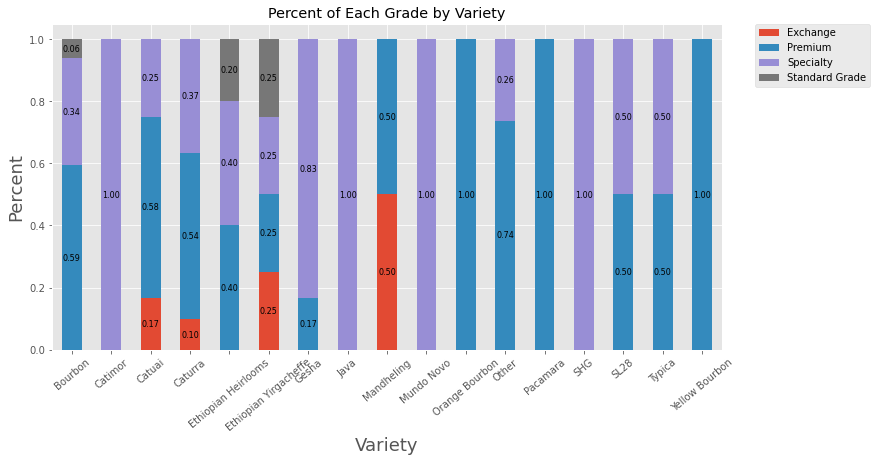

In [35]:
plt.style.use('ggplot')
ax = percentages_variety.plot(kind='bar', stacked=True, figsize=(12, 6), rot=40, xlabel='Variety', ylabel='Percent')
   
# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

     # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.2f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("Percent", fontsize=18)
ax.set_xlabel("Variety", fontsize=18)
ax.set_title("Percent of Each Grade by Variety")
plt.show()

Here we are looking for a bar with majority purple (Specialty) and blue (Premium). It seems that our top coffees based on this graph are: Catimor, Java, SHG, and Gesha.

<a class="anchor" id="trends"></a>

### 5.5 Q: Can we see any trends regarding Coffee Grade and other categorical features?

The last categorical features we need to look at are Color, Harvest Year, and Processing Method. Let's look at the percentages of each coffee grade and counts of defects for these features to get a feel for the data. 

In [36]:
def percentages(df, features):      
    for feature in features:
        percentages_feature = pd.crosstab(coffee2[feature],coffee2['Coffee_Grade']).apply(lambda r: r/r.sum(), axis=1)

        
        percentages_color = pd.crosstab(df[feature],df[feature]).apply(lambda r: r/r.sum(), axis=1)
        plt.style.use('ggplot')
        ax = percentages_feature.plot(kind='bar', stacked=True, figsize=(6, 6), rot=40, xlabel= feature, ylabel='Percent')
   
        # .patches is everything inside of the chart
        for rect in ax.patches:
            # Find where everything is located
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()

             # The height of the bar is the data value and can be used as the label
            label_text = f'{height:.2f}'  # f'{height:.2f}' to format decimal values
    
            # ax.text(x, y, text)
            label_x = x + width / 2
            label_y = y + height / 2

            # plot only when height is greater than specified value
            if height > 0:
                ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
        ax.set_ylabel("Percent", fontsize=18)
        ax.set_xlabel(feature, fontsize=18)
        plt.show()

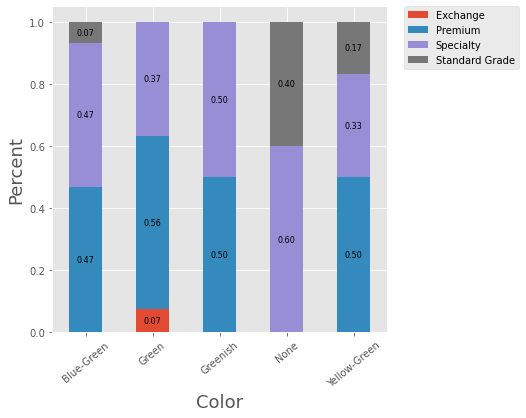

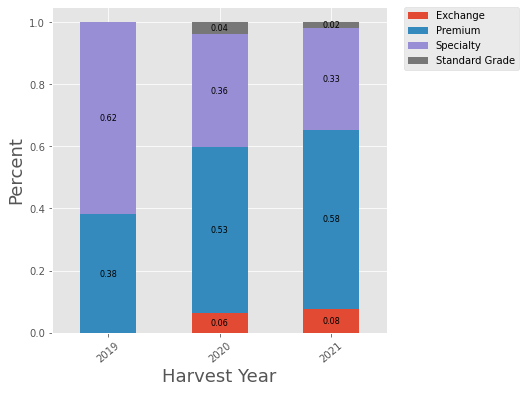

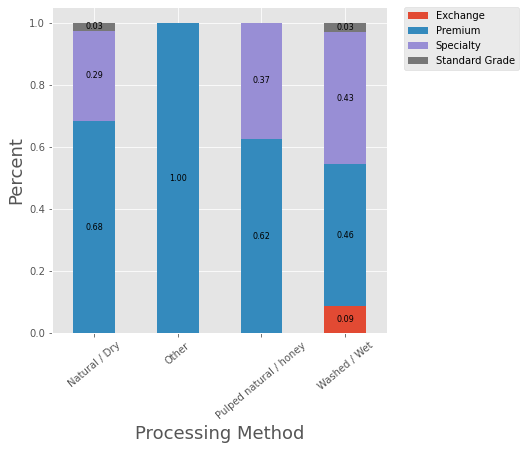

In [37]:
features = ['Color','Harvest Year','Processing Method']
percentages(coffee2, features)

Based off these graphs it seems that Green/Greenish, 2019, and Pulped natural/ honey seem to have the best looking coffee grades by percentage.

In [38]:
def meandefects(df, features):
    for feature in features:
        mean_feature = coffee2.groupby(feature).mean().sort_values("Total_Defects")

        mean_feature.plot.bar(y=['Total_Defects','Quakers'], rot=40, figsize=(10,5), stacked=True)
        plt.title("Mean Defects by")
        plt.ylabel('Defects plus quakers')

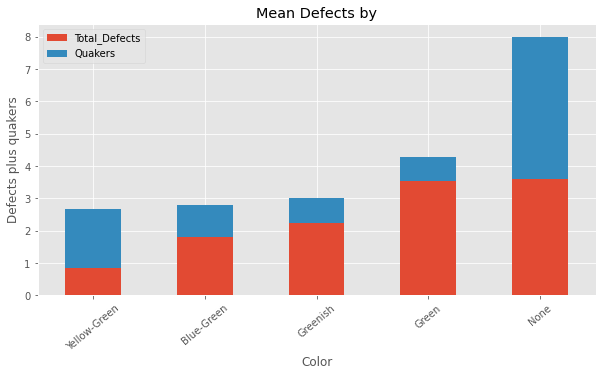

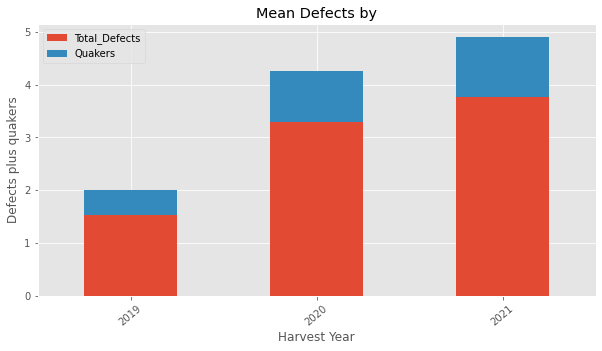

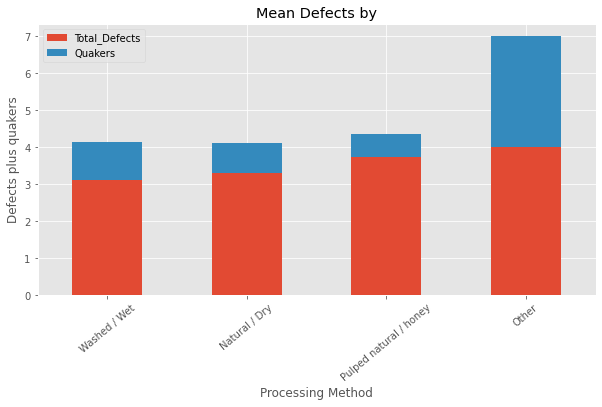

In [39]:
meandefects(coffee2, features)

These graphs agrees, with 2019 outperforming the other harvest years but shows the yellow-green color and washed/wet processing method to have less defects on average.

Conclusion: It is hard to say whether there is a clear advantage to any of the categorical features above. 2019 seems to be out performing the other years consistently but this could be due to random error. 

<a class="anchor" id="scatter"></a>

### 5.6 Scatter Matrix, Heatmap, and Correlation Matrix

The scatter matrix will reveal to us any suprising correlations as well as the distributions for the data.

array([[<AxesSubplot:xlabel='Mean Altitude (m)', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Harvest Year', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Total Cup Points', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Moisture', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Quakers', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Total_Defects', ylabel='Mean Altitude (m)'>,
        <AxesSubplot:xlabel='Coffee_Grade_Num', ylabel='Mean Altitude (m)'>],
       [<AxesSubplot:xlabel='Mean Altitude (m)', ylabel='Harvest Year'>,
        <AxesSubplot:xlabel='Harvest Year', ylabel='Harvest Year'>,
        <AxesSubplot:xlabel='Total Cup Points', ylabel='Harvest Year'>,
        <AxesSubplot:xlabel='Moisture', ylabel='Harvest Year'>,
        <AxesSubplot:xlabel='Quakers', ylabel='Harvest Year'>,
        <AxesSubplot:xlabel='Total_Defects', ylabel='Harvest Year'>,
        <AxesSubplot:xlabel='Coffee_Grade_Num', ylabel='Harvest Year'>],
 

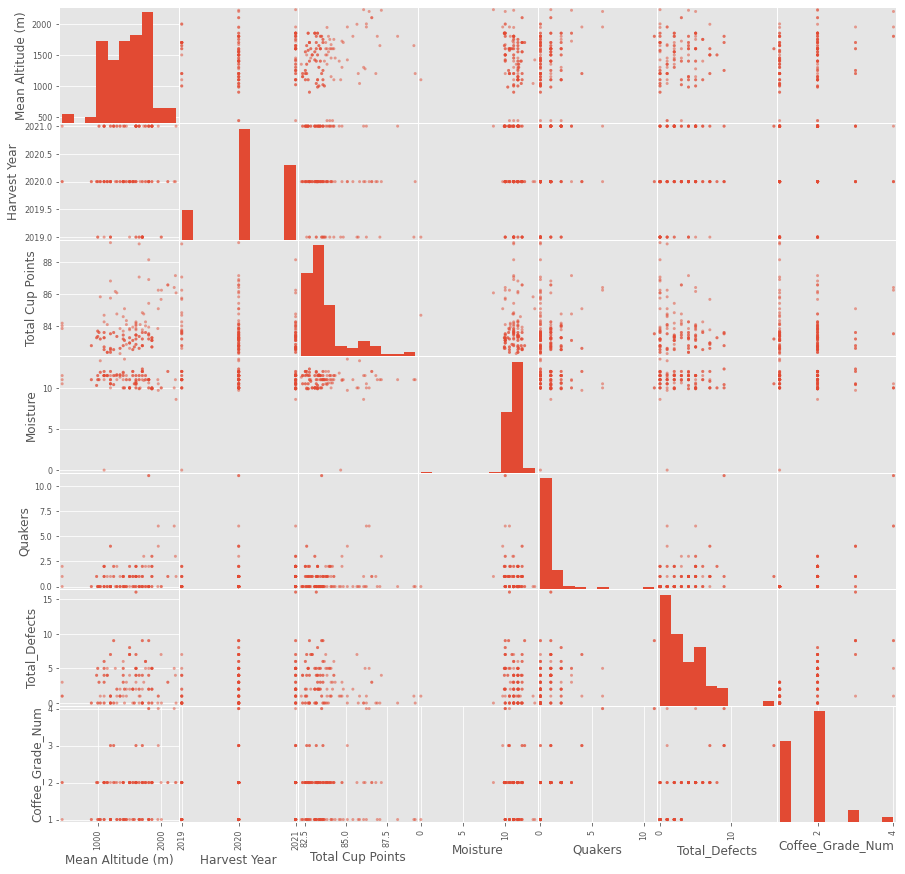

In [40]:
#plot the scatter matrix to see 
pd.plotting.scatter_matrix(coffee2, figsize=(15,15))

As noted previously, it does seem that there is a slight correlation between coffee grade and altitude and quakers and altitude. We can plot the heatmap and the correlation matrix to check the correlations between features.

<AxesSubplot:>

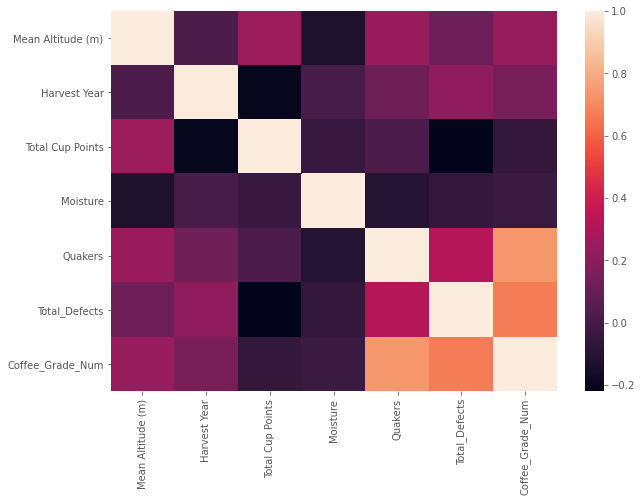

In [41]:
plt.figure(figsize = (10,7))
sns.heatmap(coffee2.corr())

In [42]:
cormat = coffee2.corr()
round(cormat,2)

,Mean Altitude (m),Harvest Year,Total Cup Points,Moisture,Quakers,Total_Defects,Coffee_Grade_Num
Mean Altitude (m),1.00,0.03,0.25,-0.13,0.24,0.13,0.24
Harvest Year,0.03,1.00,-0.21,0.01,0.12,0.22,0.15
Total Cup Points,0.25,-0.21,1.00,-0.04,0.02,-0.22,-0.06
Moisture,-0.13,0.01,-0.04,1.00,-0.10,-0.06,-0.03
Quakers,0.24,0.12,0.02,-0.10,1.00,0.33,0.74
Total_Defects,0.13,0.22,-0.22,-0.06,0.33,1.00,0.67
Coffee_Grade_Num,0.24,0.15,-0.06,-0.03,0.74,0.67,1.00


Based on the heatmap and correlation matrix, it's easy to see that there aren't a ton of highly correlated features except for coffee grade and total number of defects, which makes sense considering the fact that coffee grade is a function of total defects. For our model, we will not include Total Defects as an independent variable because of this relationship. The idea is that we want to predict the coffee grade before it is evaluated for defects.

<a class="anchor" id="conclusion"></a>

## 6. Conclusion

Based on our EDA, we have seen how lower elevations tend to increase the coffee grade and that there is statistical significance between the altitudes of the Specialty coffee and the Premium Coffee. There also seems to be a correlation between Total Cup points (which comes from people grading the coffee's more subjective features) and Coffee Grade (which comes from number of defects and quakers and is therefore more objective).
                                                                                                                                                    
We have seen how the country from where the coffee was produced, as well as the specific variety of coffee affects the Coffee Grade with some of our best coffee (in general) coming from Taiwan, Burundi, Ecuador, and Vietnam and our best varieties being Gesha, SHG, SL28, and Catimor.
                                                                                                             
Lastly, we looked at our other categorical features such as Color, Harvest Year, and Processing Method to gain insights on how each affects the Coffee Grade.

Our next steps in Feature Engineering will be to: 
   1. Condense the number of Countries and Varieties down by creating an Others category
   2. Delete Total Defects Column for reasons mentioned above
   3. Create numerical labels for our categorical data via one-hot-encoding